In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

# import matplotlib
import matplotlib.pyplot as plt
import graphviz

import sklearn.datasets as data
import sklearn.model_selection as model_select
import sklearn.linear_model as linear_model


import sklearn.preprocessing as preprocess
import sklearn.metrics as metrics

In [2]:
iris = load_iris()
print('classes = ',iris.target_names)
print('attributes = ',iris.feature_names)
M = len(iris.data)
print('number of instances = %d'%(M))

classes =  ['setosa' 'versicolor' 'virginica']
attributes =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
number of instances = 150


# 3 Constructing a Set of Classification Rules

In [3]:
X = iris.data
y = iris.target
X_pd = pd.DataFrame(X)
X_pd['y'] = y
X_pd['y'].astype('int')

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: y, Length: 150, dtype: int32

In [4]:
sepal_length_group0_class_frequency = pd.DataFrame(list(X_pd[X_pd['y']==0].groupby(X_pd[0]).count()[0].to_dict().items()),columns=['sepal length','frequency'])
sepal_length_group1_class_frequency = pd.DataFrame(list(X_pd[X_pd['y']==1].groupby(X_pd[0]).count()[0].to_dict().items()),columns=['sepal length','frequency'])
sepal_length_group2_class_frequency = pd.DataFrame(list(X_pd[X_pd['y']==2].groupby(X_pd[0]).count()[0].to_dict().items()),columns=['sepal length','frequency'])
sepal_length_X_data = pd.merge(pd.merge(sepal_length_group0_class_frequency,sepal_length_group1_class_frequency,on = 'sepal length',how = 'outer'),sepal_length_group2_class_frequency,on='sepal length',how = 'outer')
sepal_length_X_data.rename(columns = {'sepal length':'sepal length', 'frequency_x':'frequency_0', 'frequency_y':'frequency_1', 'frequency':'frequency_2'}, inplace=True)
sepal_length_X_data.fillna(0,inplace = True)
sepal_length_most_frequent_list = list(sepal_length_X_data.iloc[:,1:].idxmax(axis=1))
sepal_length_most_frequent = [int(x[-1]) for x in sepal_length_most_frequent_list]
sepal_length_X_data['most_frequent'] = sepal_length_most_frequent
sepal_length_X_data.sort_values(by='sepal length',inplace=True)
sepal_length_X_data

,sepal length,frequency_0,frequency_1,frequency_2,most_frequent
0,4.3,1.0,0.0,0.0,0
1,4.4,3.0,0.0,0.0,0
2,4.5,1.0,0.0,0.0,0
3,4.6,4.0,0.0,0.0,0
4,4.7,2.0,0.0,0.0,0
5,4.8,5.0,0.0,0.0,0
6,4.9,4.0,1.0,1.0,0
7,5.0,8.0,2.0,0.0,0
8,5.1,8.0,1.0,0.0,0
9,5.2,3.0,1.0,0.0,0


In [5]:
sepal_width_group0_class_frequency = pd.DataFrame(list(X_pd[X_pd['y']==0].groupby(X_pd[1]).count()[0].to_dict().items()),columns=['sepal width','frequency'])
sepal_width_group1_class_frequency = pd.DataFrame(list(X_pd[X_pd['y']==1].groupby(X_pd[1]).count()[0].to_dict().items()),columns=['sepal width','frequency'])
sepal_width_group2_class_frequency = pd.DataFrame(list(X_pd[X_pd['y']==2].groupby(X_pd[1]).count()[0].to_dict().items()),columns=['sepal width','frequency'])
sepal_width_X_data = pd.merge(pd.merge(sepal_width_group0_class_frequency,sepal_width_group1_class_frequency,on = 'sepal width',how = 'outer'),sepal_width_group2_class_frequency,on='sepal width',how = 'outer')
sepal_width_X_data.rename(columns = {'sepal width':'sepal width', 'frequency_x':'frequency_0', 'frequency_y':'frequency_1', 'frequency':'frequency_2'}, inplace=True)
sepal_width_X_data.fillna(0,inplace = True)
sepal_width_most_frequent_list = list(sepal_width_X_data.iloc[:,1:].idxmax(axis=1))
sepal_width_most_frequent = [int(x[-1]) for x in sepal_width_most_frequent_list]
sepal_width_X_data['most_frequent'] = sepal_width_most_frequent
sepal_width_X_data.sort_values(by=['sepal width'],inplace=True)
sepal_width_X_data

,sepal width,frequency_0,frequency_1,frequency_2,most_frequent
16,2.0,0.0,1.0,0.0,1
17,2.2,0.0,2.0,1.0,1
0,2.3,1.0,3.0,0.0,1
18,2.4,0.0,3.0,0.0,1
19,2.5,0.0,4.0,4.0,1
20,2.6,0.0,3.0,2.0,1
21,2.7,0.0,5.0,4.0,1
22,2.8,0.0,6.0,8.0,2
1,2.9,1.0,7.0,2.0,1
2,3.0,6.0,8.0,12.0,2


In [6]:
potential_rule = {}
for length in sepal_length_X_data['sepal length']:
    for width in sepal_width_X_data['sepal width']:
        tmp_width = sepal_width_X_data.loc[sepal_width_X_data[sepal_width_X_data['sepal width'] == width].index[0]]['most_frequent']
        tmp_length = sepal_length_X_data.loc[sepal_length_X_data[sepal_length_X_data['sepal length'] == length].index[0]]['most_frequent']
        potential_rule[(length,width)] = (tmp_length,tmp_width)

In [7]:
formal_rule = {}
for key,value in potential_rule.items():
    if value[0] == value[1]:
        formal_rule[key] = int(value[0])
    else:
        length_freq = int(sepal_length_X_data[sepal_length_X_data['sepal length']==key[0]]['frequency_'+str(int(value[0]))])
        width_freq = int(sepal_width_X_data[sepal_width_X_data['sepal width']==key[1]]['frequency_'+str(int(value[1]))])
        if length_freq > width_freq:
            formal_rule[key] = int(value[0])
        else:
            formal_rule[key] = int(value[1])

In [8]:
correct = 0
incorrect = 0
M = X_pd.shape[0]
for i in range(X_pd.shape[0]):
    tmp_length = X_pd.iloc[i][0]
    tmp_width = X_pd.iloc[i][1]
    real = int(X_pd.iloc[i]['y'])
    predict = formal_rule[(tmp_length,tmp_width)]
    if predict == real:
        correct += 1
    else:
        incorrect += 1

In [9]:
score = correct / M

In [10]:
error = incorrect / M

In [11]:
score

0.5933333333333334

In [12]:
error

0.4066666666666667

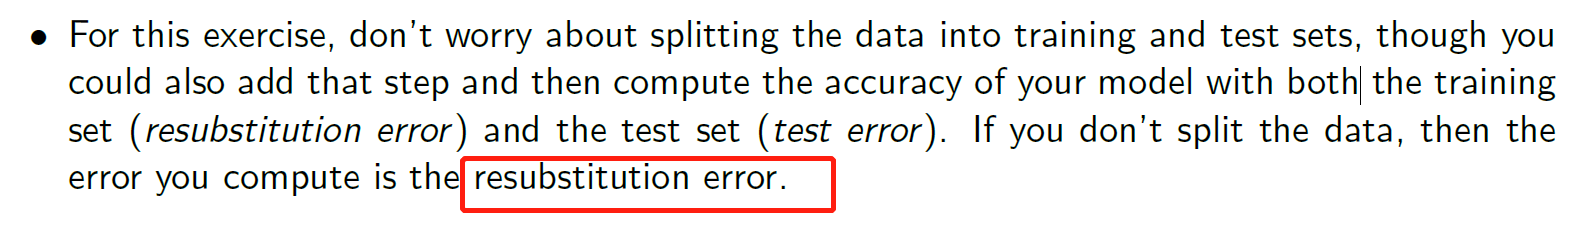

# 4 Constructing a Decision Tree Classifier

In [13]:
iris = load_iris()
print('classes = ',iris.target_names)
# split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,random_state=0)
M_train = X_train.shape[0]
M_test = X_test.shape[0]

classes =  ['setosa' 'versicolor' 'virginica']


In [14]:
# initialise the decision tree
clf = tree.DecisionTreeClassifier(random_state=0)
# fit the tree model to the training data
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

## 4.1 How good is your model?

In [15]:
# 1 count the number of correctly predicted labels
y_hat = clf.predict(X_test)
# count the number of correctly predicted labels
count = 0.0
for i in range(M_test):
    if y_hat[i] == y_test[i]:
        count += 1
score = (count / M_test)*100
print('number of correct predictions = %d out of %d =%f%%'%(count,M_test,score))

number of correct predictions = 37 out of 38 =97.368421%


In [16]:
# 2 Use the scikit-learn classier score() function:
print("training score = " ,clf.score(X_train,y_train))
print("test_score = ",clf.score(X_test,y_test))

training score =  1.0
test_score =  0.9736842105263158


In [17]:
# 3 use the scikit-learn metrices package to compute the accuracy
print('accuracy score = ',metrics.accuracy_score(y_test,y_hat))

accuracy score =  0.9736842105263158


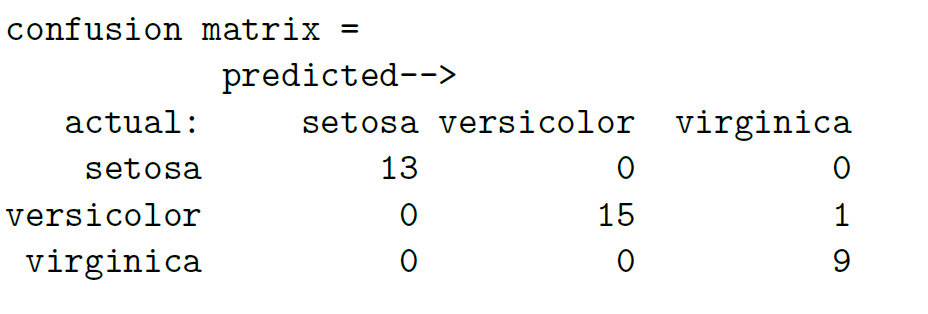

In [18]:
# 4. You could compute a confusion matrix:
cm = metrics.confusion_matrix(y_test,y_hat)

In [19]:
cm
# 竖着看是actual，横着是predict
# 主对角线是预测正确
# 1那个是 actual 1，predict 2；

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [20]:
precision = metrics.precision_score(y_test,y_hat,average=None)

In [21]:
# presicion = tp / (tp + fp)
precision
# 预测的有多少是准的

array([1. , 1. , 0.9])

In [22]:
recall = metrics.recall_score(y_test,y_hat,average=None)

In [23]:
# recall tp / tp + fn
recall
# 阳的有多少被检查出来了

array([1.    , 0.9375, 1.    ])

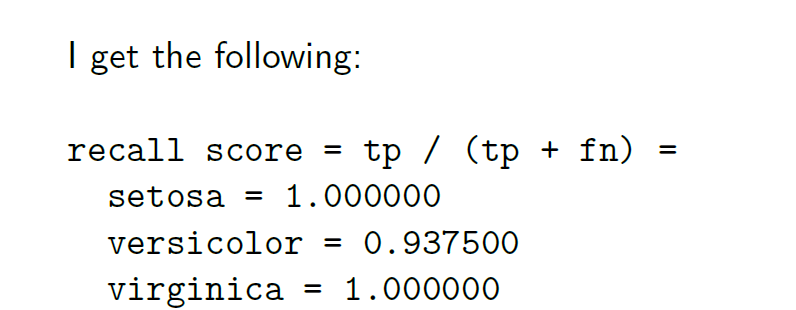

In [24]:
# compute F1 score
f1 = metrics.f1_score(y_test,y_hat,average=None)

In [25]:
# f1是下加上乘
f1

array([1.        , 0.96774194, 0.94736842])

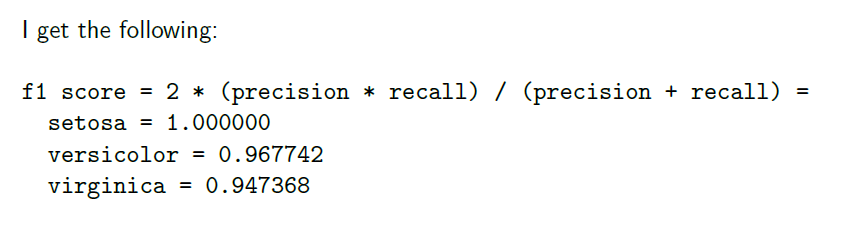

## 4.2 What does the decision tree look like?

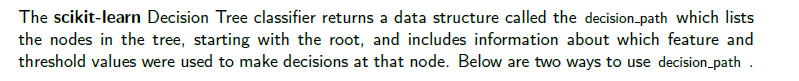

In [26]:
decision_tree_path = clf.decision_path(iris.data)
print('decision_path:')
print(decision_tree_path)

decision_path:
  (0, 0)	1
  (0, 1)	1
  (1, 0)	1
  (1, 1)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 1)	1
  (5, 0)	1
  (5, 1)	1
  (6, 0)	1
  (6, 1)	1
  (7, 0)	1
  (7, 1)	1
  (8, 0)	1
  (8, 1)	1
  (9, 0)	1
  (9, 1)	1
  (10, 0)	1
  (10, 1)	1
  (11, 0)	1
  (11, 1)	1
  (12, 0)	1
  :	:
  (143, 12)	1
  (144, 0)	1
  (144, 2)	1
  (144, 8)	1
  (144, 12)	1
  (145, 0)	1
  (145, 2)	1
  (145, 8)	1
  (145, 12)	1
  (146, 0)	1
  (146, 2)	1
  (146, 8)	1
  (146, 12)	1
  (147, 0)	1
  (147, 2)	1
  (147, 8)	1
  (147, 12)	1
  (148, 0)	1
  (148, 2)	1
  (148, 8)	1
  (148, 12)	1
  (149, 0)	1
  (149, 2)	1
  (149, 8)	1
  (149, 12)	1


https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
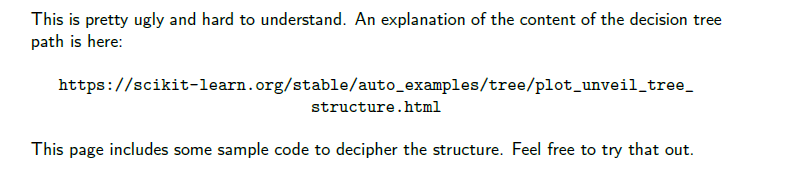

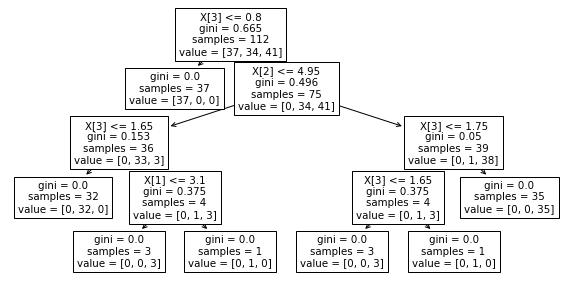

In [27]:
plt.figure(figsize=(10,5))
tree.plot_tree(clf)
plt.show()

In [28]:
tree.export_graphviz(clf,out_file='iris_tree.dot',class_names=iris.target_names,impurity=True)

# 5 Constructing a Logistic Regression Classifier

In [29]:
# load iris data
iris = data.load_iris()

# we will only look at two dimensions(oth and 1st)
X = iris.data[:,:2]
y = iris.target
X_train,X_test, y_train,y_test = model_select.train_test_split(X,y,random_state=0)
# initialise logistic regression model
clf = linear_model.LogisticRegression(solver = 'lbfgs',multi_class='multinomial')

# fit model to iris data
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

## 5.1 How good is your model?

In [30]:
# 1 count the number of correctly predicted labels
y_hat = clf.predict(X_test)
# count the number of correctly predicted labels
count = 0.0
M_test = X_test.shape[0]
for i in range(M_test):
    if y_hat[i] == y_test[i]:
        count += 1
score = (count / M_test)*100
print('number of correct predictions = %d out of %d =%f%%'%(count,M_test,score))

number of correct predictions = 30 out of 38 =78.947368%


In [31]:
# 2 Use the scikit-learn classifier score() function:
print("training score = " ,clf.score(X_train,y_train))
print("test_score = ",clf.score(X_test,y_test))

training score =  0.8392857142857143
test_score =  0.7894736842105263


In [32]:
# 3 use the scikit-learn metrices package to compute the accuracy
print('accuracy score = ',metrics.accuracy_score(y_test,y_hat))

accuracy score =  0.7894736842105263


In [33]:
# 4. You could compute a confusion matrix:
cm = metrics.confusion_matrix(y_test,y_hat)

In [34]:
cm
# 竖着看是actual，横着是predict
# 主对角线是预测正确
# 1那个是 actual 1，predict 2；

array([[13,  0,  0],
       [ 0, 11,  5],
       [ 0,  3,  6]], dtype=int64)

In [35]:
precision = metrics.precision_score(y_test,y_hat,average=None)
# presicion = tp / (tp + fp)
precision
# 预测的有多少是准的

array([1.        , 0.78571429, 0.54545455])

In [36]:
recall = metrics.recall_score(y_test,y_hat,average=None)
# recall tp / tp + fn
recall
# 阳的有多少被检查出来了

array([1.        , 0.6875    , 0.66666667])

In [37]:
# compute F1 score
f1 = metrics.f1_score(y_test,y_hat,average=None)
# f1是下加上乘
f1

array([1.        , 0.73333333, 0.6       ])

## 5.2 What do the decision boundaries look like?

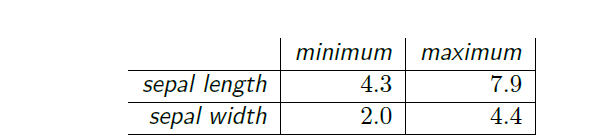

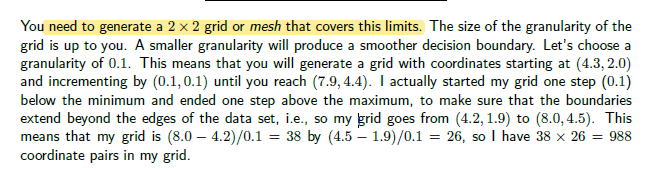

In [38]:
# length_max = X_pd[0].max()
# length_min = X_pd[0].min()
# length_step = (X_pd[0].max() - length_min)/0.1
# width_max = X_pd[1].max()
# width_min = X_pd[1].min()

In [39]:
granularity = 0.01
length_range = np.linspace(X_pd[0].min()-0.1, X_pd[0].max()+0.1, round((X_pd[0].max()+0.1-(X_pd[0].min()-0.1))/granularity))
width_range = np.linspace(X_pd[1].min()-0.1,X_pd[1].max()+0.1,round((X_pd[1].max()+0.1-(X_pd[1].min()-0.1))/granularity))
x_coordinate, y_coordinate = np.meshgrid(length_range, width_range)
X_pairs = np.array([[x_coordinate[i][j],y_coordinate[i][j]]for i in range(x_coordinate.shape[0]) for j in range(x_coordinate.shape[1])])
y_hat_pairs = clf.predict(X_pairs)

In [40]:
print('mesh score = ',clf.score(X_pairs,y_hat_pairs))

mesh score =  1.0


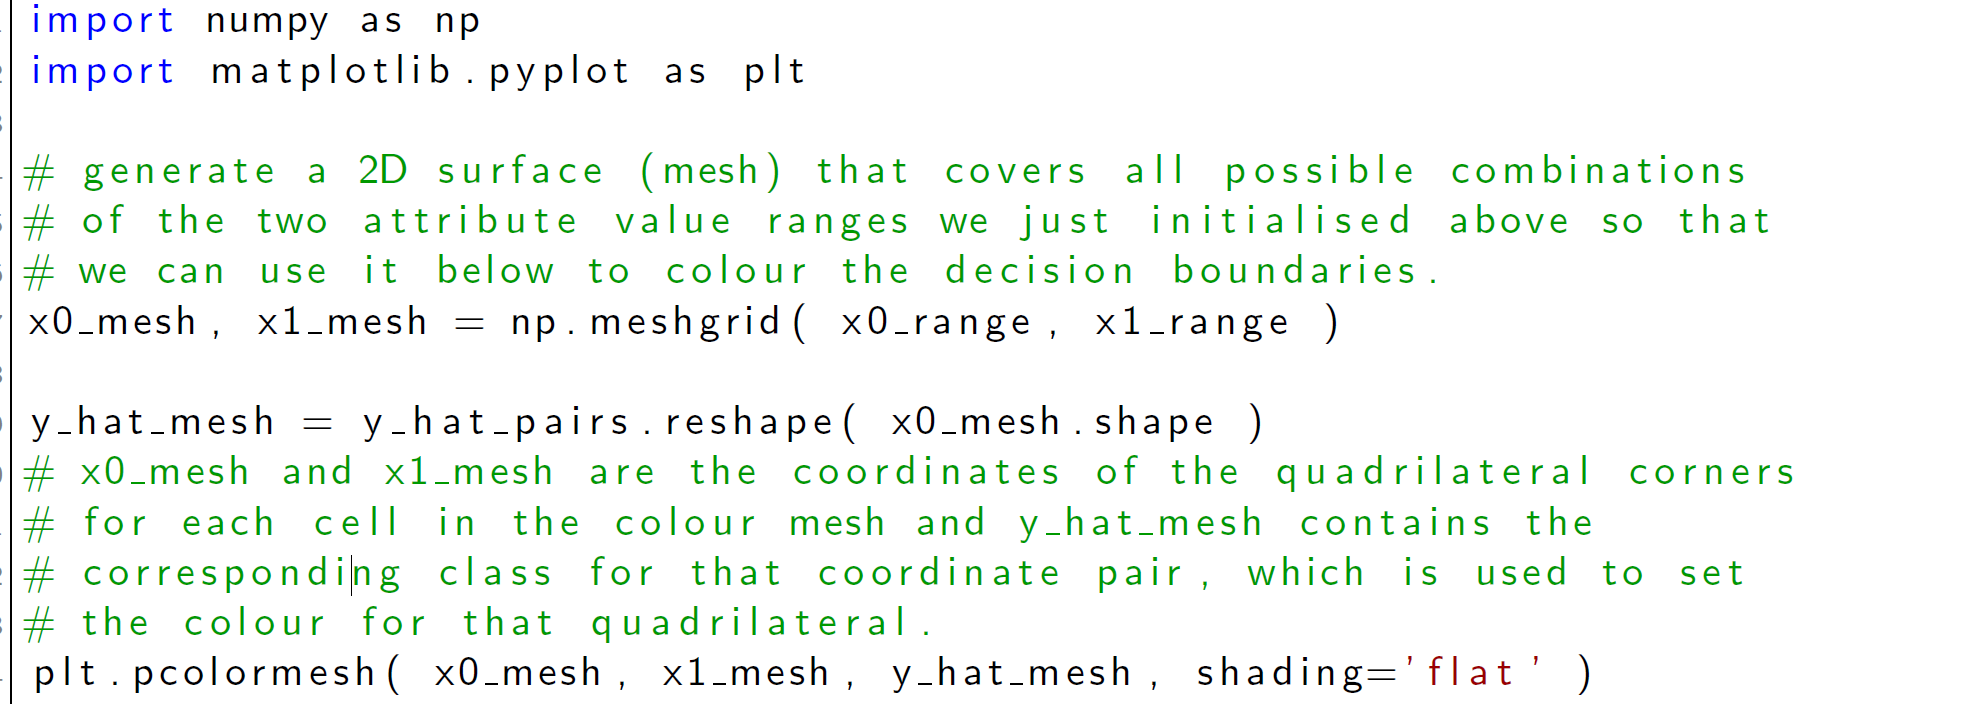

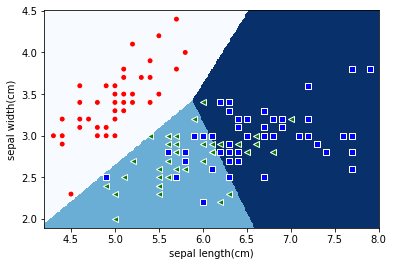

In [41]:
# cm_dark = matplotlib.colors.ListedColormap(['r', 'g', 'y'])
plt.figure()
plt.set_cmap('Blues')
x0_mesh, x1_mesh = np.meshgrid(length_range, width_range)
y_hat_mesh = y_hat_pairs.reshape(x_coordinate.shape)
plt.pcolormesh(x0_mesh,x1_mesh,y_hat_mesh,shading='auto')
plt.scatter(X_pd[X_pd['y']==0][0],X_pd[X_pd['y']==0][1],c=X_pd[X_pd['y']==0]['y'],cmap='rainbow_r',marker='o',edgecolors=['white'])
plt.scatter(X_pd[X_pd['y']==1][0],X_pd[X_pd['y']==1][1],c='green',marker='<',edgecolors=['white'])
plt.scatter(X_pd[X_pd['y']==2][0],X_pd[X_pd['y']==2][1],c='blue',marker='s',edgecolors=['white'])

plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.show()

**Marks for reference**<br>
https://matplotlib.org/stable/tutorials/introductory/customizing.html?highlight=scatter.edgecolors#a-sample-matplotlibrc-file
https://www.pythonpool.com/matplotlib-marker/#:~:text=The%20matplotlib%20markers%20module%20in%20python%20provides%20all,you%20can%20customize%20them%20by%20using%20marker%20functions.

## 5.3 How good are the decision boundaries?

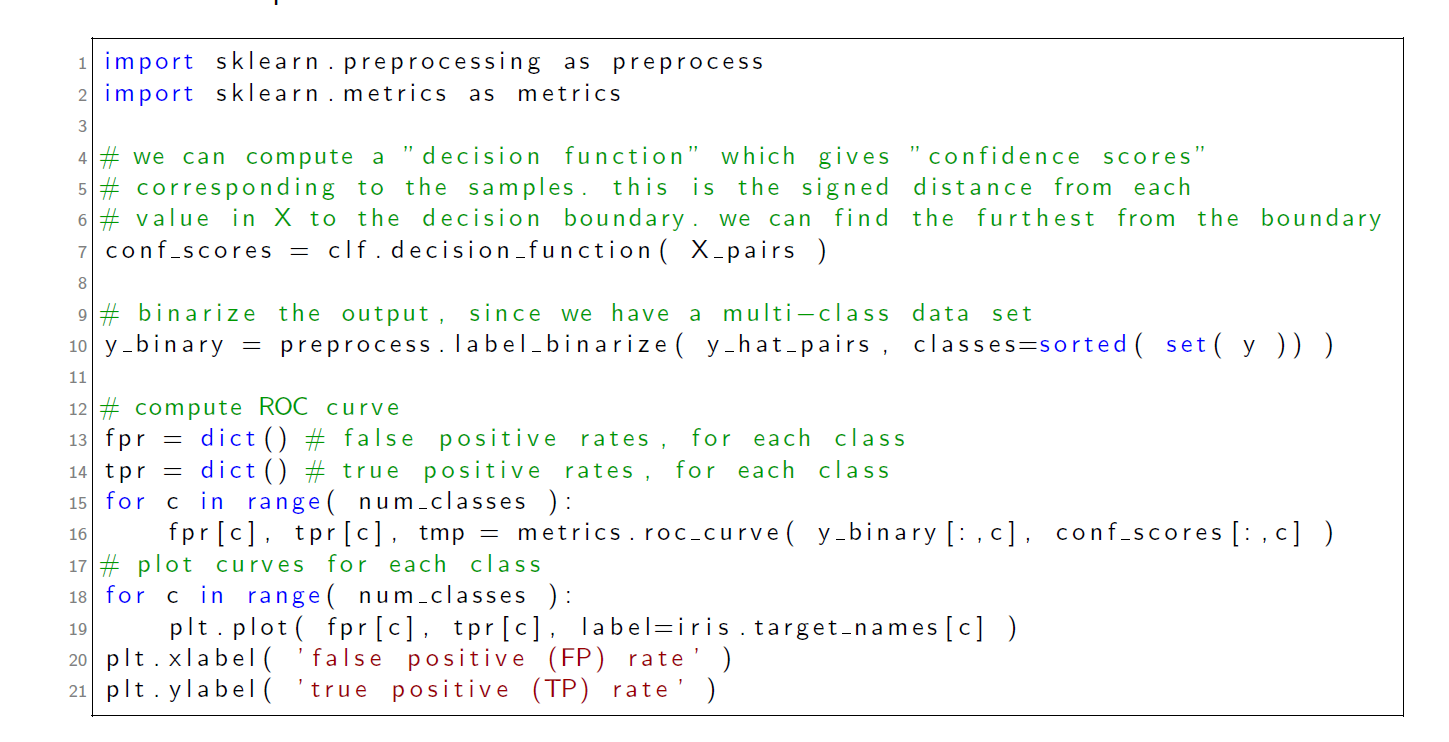

binary的作用是类似创建dummy variable，底层创建了多个logistic 回归，类似one vs all的想法！

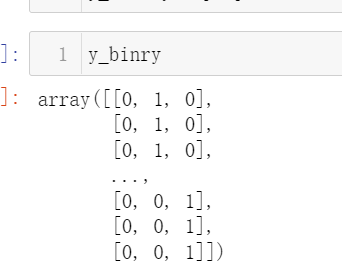

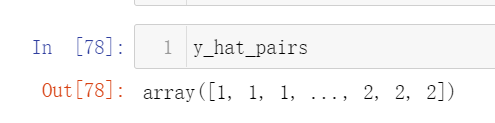

**Line plot styles in Matplotlib**<br>
https://www.pythoninformer.com/python-libraries/matplotlib/line-plots/#:~:text=%20Line%20plot%20styles%20in%20Matplotlib%20%201,that%20indicates%20a%20data%20point%20on...%20More%20

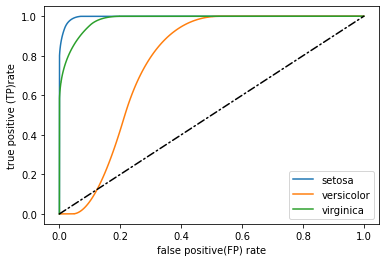

In [42]:
num_classes = len(set(y_hat_pairs))
conf_scores = clf.decision_function(X_pairs)
y_binary = preprocess.label_binarize(y_hat_pairs,classes=sorted(set(y)))
fpr = dict()
tpr = dict()
for c in range(num_classes):
    fpr[c],tpr[c],tmp = metrics.roc_curve(y_binary[:,c],conf_scores[:,c])

figure = plt.figure()
labels = list(iris.target_names)
for c in range(num_classes):
    plt.plot(fpr[c],tpr[c])
plt.plot(np.linspace(0, 1, 100), np.linspace(0,1,100),linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round',c='black')
plt.xlabel('false positive(FP) rate')
plt.ylabel('true positive (TP)rate')
plt.legend(labels=labels,loc='lower right')


plt.show()